# Music Reommender System 

# Data Preparetion

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.impute import SimpleImputer
from joblib import dump, load
import joblib

import warnings
warnings.filterwarnings('ignore')

In [53]:
music_data = pd.read_csv('Spotify_Youtube.csv', encoding='utf-8')
music_data.head()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [54]:
#find missing value
music_data.isnull().sum()

Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [55]:
#clear the data with missing values
music_data.dropna(inplace=True)
music_data.isnull().sum()

Artist              0
Url_spotify         0
Track               0
Album               0
Album_type          0
Uri                 0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Url_youtube         0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
Description         0
Licensed            0
official_video      0
Stream              0
dtype: int64

In [56]:
#check duplicate data
music_data.duplicated().sum()

0

In [57]:
#delete duplicate data(in this dataset don't have so dismiss)
music_data=music_data.drop_duplicates()
music_data.duplicated().sum()

0

In [58]:
#(row, column)
music_data.shape

(19170, 27)

In [59]:
music_data['Artist']

0           Gorillaz
1           Gorillaz
2           Gorillaz
3           Gorillaz
4           Gorillaz
            ...     
20713    SICK LEGEND
20714    SICK LEGEND
20715    SICK LEGEND
20716    SICK LEGEND
20717    SICK LEGEND
Name: Artist, Length: 19170, dtype: object

# Data Exploration

In [60]:
music_data.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,1.917000e+04,1.917000e+04,1.917000e+04,1.917000e+04,1.917000e+04
mean,0.621178,0.636150,5.292645,-7.615305,0.094944,0.287817,0.055476,0.191322,0.528267,120.607345,2.247612e+05,9.719768e+07,6.823531e+05,2.838656e+04,1.382746e+08
std,0.165533,0.213439,3.579947,4.617605,0.104931,0.285630,0.192768,0.165217,0.244996,29.588308,1.278468e+05,2.799997e+08,1.820550e+06,1.977979e+05,2.477309e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,2.600000e+01,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.520000,0.510000,2.000000,-8.745000,0.035700,0.043600,0.000000,0.094100,0.338000,96.997500,1.802670e+05,2.070213e+06,2.447350e+04,5.830000e+02,1.786937e+07
50%,0.639000,0.667000,5.000000,-6.504000,0.050600,0.188000,0.000002,0.125000,0.535000,119.969000,2.133210e+05,1.568959e+07,1.332770e+05,3.515500e+03,5.037938e+07
75%,0.742000,0.798000,8.000000,-4.918500,0.104000,0.469000,0.000436,0.234000,0.724000,139.946000,2.519630e+05,7.369040e+07,5.423462e+05,1.494100e+04,1.407579e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


In [61]:
views = music_data['Views']
total_views = views.sum()
print("The total views track in the songs list is: ", int(total_views))
max_views = views.max()
print("The most views track in the songs list is: ", int(max_views))
min_views = views.min()
print("The least views tracks in the songs list is: ", int(min_views))
mean_views = views.mean()
print("The mean views tracks in the songs list is: " , round(mean_views, 4))
median_views = np.median(views)
print("The median views tracks in the songs list is: ", round(median_views,4))
std_views = np.std(views)
print("The standard deviation likes tracks in the songs list is: ", round(std_views,4))

The total views track in the songs list is:  1863279590430
The most views track in the songs list is:  8079649362
The least views tracks in the songs list is:  26
The mean views tracks in the songs list is:  97197683.3818
The median views tracks in the songs list is:  15689592.0
The standard deviation likes tracks in the songs list is:  279992360.1489


In [62]:
likes = music_data['Likes']
total_likes = likes.sum()
print("The total likes that given by the users is: ", int(total_likes))
max_likes = likes.max()
print("The most likes track in the songs list is: ", int(max_likes))
min_likes = likes.min()
print("The least likes tracks in the songs list is: ", int(min_likes))
mean_likes = likes.mean()
print("The mean likes tracks in the songs list is: " , round(mean_likes, 4))
median_likes = np.median(likes)
print("The median likes tracks in the songs list is: ", round(median_likes,4))
std_likes = np.std(likes)
print("The standard deviation views tracks in the songs list is: ", round(std_likes,4))

The total likes that given by the users is:  13080709788
The most likes track in the songs list is:  50788652
The least likes tracks in the songs list is:  0
The mean likes tracks in the songs list is:  682353.1449
The median likes tracks in the songs list is:  133277.0
The standard deviation views tracks in the songs list is:  1820502.7046


In [63]:
comments = music_data['Comments']
total_comments = comments.sum()
print("The total comments leave by the users is: ", int(total_comments))
max_comments = comments.max()
print("The most comments track in the songs list is: ", int(max_comments))
min_comments = comments.min()
print("The least comments tracks in the songs list is: ", int(min_comments))
mean_comments = comments.mean()
print("The mean comments tracks in the songs list is: " , round(mean_comments, 4))
median_comments = np.median(comments)
print("The median comments tracks in the songs list is: ", round(median_comments,4))
std_comments = np.std(comments)
print("The standard deviation comments tracks in the songs list is: ", round(std_comments,4))

The total comments leave by the users is:  544170318
The most comments track in the songs list is:  16083138
The least comments tracks in the songs list is:  0
The mean comments tracks in the songs list is:  28386.5581
The median comments tracks in the songs list is:  3515.5
The standard deviation comments tracks in the songs list is:  197792.7005


# Data Visualization 

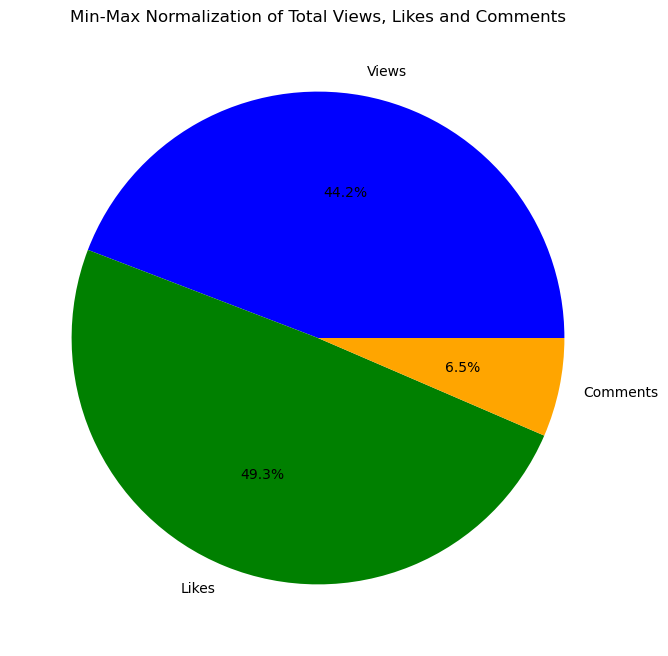

In [64]:
normalized_total_views = (total_views - min_views) / (max_views - min_views)
normalized_total_likes = (total_likes - min_likes) / (max_likes - min_likes)
normalized_total_comments = (total_comments - min_comments) / (max_comments - min_comments)

categories = ['Views', 'Likes', 'Comments']
normalized_totals = [normalized_total_views, normalized_total_likes, normalized_total_comments]

plt.figure(figsize=(8, 8))
plt.pie(normalized_totals, labels=categories, autopct='%1.1f%%', colors=['blue', 'green', 'orange'])
plt.title('Min-Max Normalization of Total Views, Likes and Comments')
plt.show()

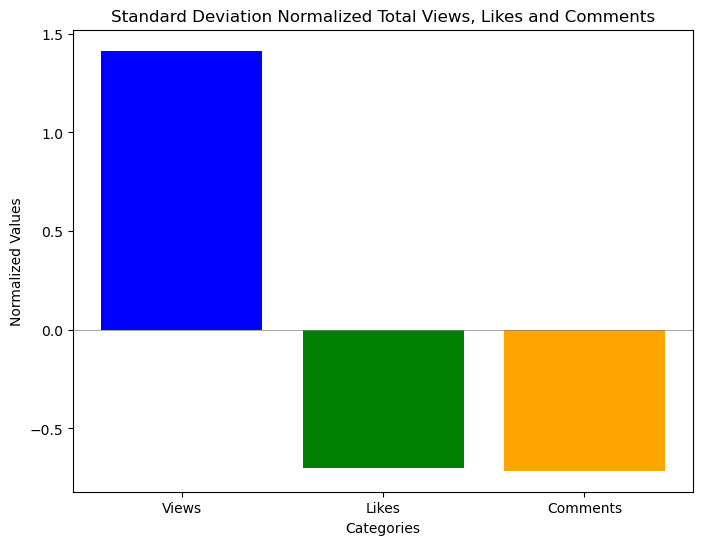

In [65]:
categories = ['Views', 'Likes', 'Comments']
totals = [total_views, total_likes, total_comments]

mean_totals = sum(totals) / len(totals)
std_totals = np.std(totals)

normalized_totals = [(x - mean_totals) / std_totals for x in totals]

plt.figure(figsize=(8, 6))
plt.bar(categories, normalized_totals, color=['blue', 'green', 'orange'])
plt.axhline(0, color='gray', linewidth=0.5)  # Add horizontal line at y=0
plt.title('Standard Deviation Normalized Total Views, Likes and Comments')
plt.xlabel('Categories')
plt.ylabel('Normalized Values')
plt.show()


#  Deployment

In [69]:
def collaborative_filtering(track_title):
    similarity_matrix = cosine_similarity(music_data[['Likes', 'Views', 'Comments']])
    
    track_index = music_data[music_data['Track'] == track_title].index[0]
    
    similar_tracks = list(enumerate(similarity_matrix[track_index]))
    
    sorted_similar_tracks = sorted(similar_tracks, key=lambda x: x[1], reverse=True)
    
    top_similar_tracks = sorted_similar_tracks[1:11]
    
    # Return top similar tracks
    return top_similar_tracks

# Testing
track_title = "Feel Good Inc."
collab_filtering_result = collaborative_filtering(track_title)
print("Top 10 tracks similar to", track_title, "based on Collaborative Filtering:")

for track in collab_filtering_result:
    print("- Track:", music_data.iloc[track[0]]['Track'])
    print("  Similarity Score:", track[1])

dump(collab_filtering_result, 'music_recommender_model_collaborative.joblib')
print("Collaborative filtering model saved successfully.")

dump(collab_filtering_result, 'collab_filtering_result.joblib')

Top 10 tracks similar to Feel Good Inc. based on Collaborative Filtering:
- Track: A Little Bit Off
  Similarity Score: 0.9999999999369806
- Track: Dirty Harry
  Similarity Score: 0.9999999999321422
- Track: Looking at Me
  Similarity Score: 0.9999999999231627
- Track: Same God (feat. Jonsal Barrientes)
  Similarity Score: 0.9999999999086852
- Track: Blue Laces 2
  Similarity Score: 0.9999999998923077
- Track: Que No, Que No
  Similarity Score: 0.9999999998175947
- Track: Renegades
  Similarity Score: 0.9999999996156652
- Track: Soy El Ratón
  Similarity Score: 0.999999999591226
- Track: Never Tear Us Apart
  Similarity Score: 0.9999999995371304
- Track: Taaron Ke Shehar
  Similarity Score: 0.9999999994844831
Collaborative filtering model saved successfully.


['collab_filtering_result.joblib']

In [ ]:
import difflib

def find_closest_match(user_input):
    track_titles = music_data['Track'].tolist()
    
    closest_matches = difflib.get_close_matches(user_input, track_titles, n=1, cutoff=0.6)
    
    if closest_matches:
        return closest_matches[0]
    else:
        return None
    
track_title = input("Enter the title of the track: ")

closest_match = find_closest_match(track_title)

if closest_match:
    print("Closest match found:", closest_match)
    collab_filtering_result = collaborative_filtering(closest_match)
    print("\nTop 10 tracks similar to", closest_match, "based on Collaborative Filtering:")
    for track in collab_filtering_result:
        print(music_data.iloc[track[0]]['Track'])
else:
    print("There's no track such as", track_title, "Please enter another title")